# Trotterization

Bloq for building a Trotterized unitary

In [ ]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `TrotterizedUnitary`
Implement arbitrary trotterized unitary given any Trotter splitting of the Hamiltonian.

Given an arbitrary splitting of the Hamiltonian into $m$ terms

$$
    H = \sum_j=1^m H_j
$$

then the unitary $e^{i t H}$ can be approximately implemented via Trotterization as

$$
    U \approx \prod_k=1^l \prod_j e^{i t c_k H_j}
$$

where $c_j^k$ are some coefficients.

#### Parameters
 - `bloqs`: A tuple of bloqs of length `m` which implement the unitaries for each term in the Hamiltonian.
 - `indices`: A tuple of length `l` which specifies which bloq to apply when forming the unitary as a product of unitaries.
 - `coeffs`: The coefficients `c_k` which appear in the expression for the unitary.
 - `timestep`: The timestep `t`. 

#### Registers
 - `system`: The system register to which to apply the unitary.


In [ ]:
from qualtran.bloqs.for_testing.ising import IsingXUnitary, IsingZZUnitary
from qualtran.bloqs.chemistry.trotter.trotterized_unitary import TrotterizedUnitary

### Example Instances

In [ ]:
from qualtran.bloqs.for_testing.ising import IsingXUnitary, IsingZZUnitary

nsites = 3
j_zz = 2
gamma_x = 0.1
dt = 0.01
indices = (0, 1, 0)
coeffs = (0.5 * gamma_x, j_zz, 0.5 * gamma_x)
zz_bloq = IsingZZUnitary(nsites=nsites, angle=2 * dt * j_zz)
x_bloq = IsingXUnitary(nsites=nsites, angle=0.5 * 2 * dt * gamma_x)
trott_unitary = TrotterizedUnitary(
    bloqs=(x_bloq, zz_bloq), indices=indices, coeffs=coeffs, timestep=dt
)

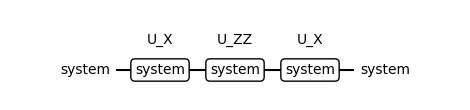

In [6]:
from qualtran.drawing import show_bloq
show_bloq(trott_unitary.decompose_bloq(), 'musical_score')

#### Graphical Signature

### Call Graph

In [ ]:
trott_unitary_g, trott_unitary_sigma = trott_unitary.call_graph()
show_call_graph(trott_unitary_g)
show_counts_sigma(trott_unitary_sigma)

In [ ]:
from qualtran.drawing import show_bloqs
show_bloqs([trott_unitary],
           ['`trott_unitary`'])